## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.shape

(15, 2)

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

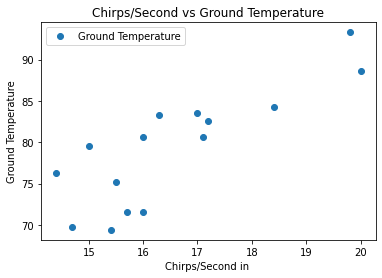

In [ ]:
df.plot(x="Chirps/Second",y="Ground Temperature",style='o')
plt.title("Chirps/Second vs Ground Temperature")
plt.xlabel("Chirps/Second in ")
plt.ylabel("Ground Temperature")
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


##note

0.83 good correlation 
good sign we can go head with linear regression no transformation required

In [ ]:
X = df.loc[:,["Ground Temperature"]].values
y = df.loc[:,["Chirps/Second"]].values


In [ ]:
y

array([[20. ],
       [16. ],
       [19.8],
       [18.4],
       [17.1],
       [15.5],
       [14.7],
       [15.7],
       [15.4],
       [16.3],
       [15. ],
       [17.2],
       [16. ],
       [17. ],
       [14.4]])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

[16.47]


In [ ]:
print(regressor.coef_)

[[1.27935188]]


In [ ]:
regressor.predict([[95]]) # indicate perils of extrapolation

array([[138.00842823]])

In [ ]:
y_pred = regressor.predict(X_test) 
y_pred

array([[17.66517575],
       [14.67723638],
       [17.03727545],
       [19.78704574],
       [17.62187228]])

In [ ]:
data = pd.DataFrame({'Actual': [y_test], 'Name': [y_pred]})
data

,Actual,Predicted
0,"[[17.0], [14.7], [16.0], [19.8], [16.3]]","[[17.665175748132533], [14.677236377801202], [..."


In [ ]:
data = pd.DataFrame(list(zip(y_test, y_pred)),
               columns =['Actual', 'Actual'])
data

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7720882330773073
